##Setup environment

In [ ]:
# CUDA: Let's check that Nvidia CUDA drivers are already pre-installed and which version is it.
# We need to install the correct cuDNN according to this output
!/usr/local/cuda/bin/nvcc --version
# take a look at the kind of GPU we have
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
Thu Apr 11 13:10:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8               9W /  7

## Mount Drive

Mounting the drive is not nessasary but can be handy to use

In [ ]:
# Alternatively, skip this cell and mount drive from left sidebar.
%cd ..
from google.colab import drive
#drive.flush_and_unmount()
drive.mount('/content/drive')

/
Mounted at /content/drive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s "/content/drive/MyDrive/Colab Notebooks" /mydrive

# Make the working folder
%mkdir -p /mydrive/yolov8fire

mkdir: cannot create directory ‘/mydrive’: File exists


In [ ]:
# list the contents of /mydrive
!ls -la /content/drive
!ls -la /mydrive/

total 20
dr-x------  2 root root 4096 Apr  3 13:03 .file-revisions-by-id
drwx------ 30 root root 4096 Apr  3 13:03 MyDrive
drwx------  2 root root 4096 Apr  3 13:03 Othercomputers
dr-x------  2 root root 4096 Apr  3 13:03 .shortcut-targets-by-id
drwx------  5 root root 4096 Apr  3 13:03 .Trash-0
ls: cannot access '/mydrive/': No such file or directory


## Install yolov8

install ultralystics library for Yolov8

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/yolov8fire

/content/drive/MyDrive/Colab_Notebooks/yolov8fire


In [ ]:
#!pip install ultralytics==8.0.196
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 14.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

Check that everything is properly installed and working

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 29.1/201.2 GB disk)

OS                  Linux-6.1.58+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 50.99 GB
CPU                 Intel Xeon 2.00GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.2.1+cu121>=1.8.0
torchvision         ✅ 0.17.1+cu121>=0.9.0
tqdm                ✅ 4.66.2>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0


## Prepare dataset

The example below is how to get a dataset using roboflow you just paste in their code to download the dataset that you would need you can also select the type of annotations needed so no need for conversion just select yolov8

In [ ]:
%ls Fire-Detection-2/

data.yaml         README.dataset.txt   test_split/  train_split/
hyp.scratch.yaml  README.roboflow.txt  train/       val_split/


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wXptZbVeImpolkixdKXS")
project = rf.workspace("california").project("fire-detection-pnfo0")
version = project.version(2)
dataset = version.download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.1

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fire-Detection-2 in yolov8:: 100%|██████████| 39994/39994 [04:47<00:00, 139.05it/s]


<h3>Splitting Dataset(if nessasary)</h3>
Some Datasets in roboflow only contain Images or do not have the correct split of images so this needs to be fixed as yolov8 needs validation and test images. The code below I used  to split the training directory in to three folders for training, testing and validation

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define base directory and subdirectories for images and labels
base_dir = '/content/drive/MyDrive/Colab_Notebooks/yolov8fire/Fire-Detection-2'
image_dir = os.path.join(base_dir, 'train', 'images')
label_dir = os.path.join(base_dir, 'train', 'labels')

# Create directories for the split datasets
splits = ['train_split', 'val_split', 'test_split']
for split in splits:
    os.makedirs(os.path.join(base_dir, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(base_dir, split, 'labels'), exist_ok=True)

# Function to split and copy files
def split_and_copy_files(src_dir, dest_base_dir, file_names, split_name, extension):
    dest_images_dir = os.path.join(dest_base_dir, split_name, 'images')
    dest_labels_dir = os.path.join(dest_base_dir, split_name, 'labels')

    for file_name in file_names:
        src_file_path = os.path.join(src_dir, f"{file_name}.{extension}")
        if 'images' in src_dir:
            dest_file_path = os.path.join(dest_images_dir, f"{file_name}.{extension}")
        else:
            dest_file_path = os.path.join(dest_labels_dir, f"{file_name}.{extension}")

        if os.path.exists(src_file_path):
            shutil.copy(src_file_path, dest_file_path)
            print(f"Copied {src_file_path} to {dest_file_path}")
        else:
            print(f"File does not exist: {src_file_path}")

# List of all unique base filenames without extension in the images directory
base_filenames = {os.path.splitext(f)[0] for f in os.listdir(image_dir)}

# Split dataset into train, validation, and test sets
train_files, test_files = train_test_split(list(base_filenames), test_size=0.3, random_state=42)
val_files, test_files = train_test_split(test_files, test_size=1/3, random_state=42)

# Copy files to their respective directories
for split_name, file_names in zip(['train_split', 'val_split', 'test_split'], [train_files, val_files, test_files]):
    split_and_copy_files(image_dir, base_dir, file_names, split_name, 'jpg')
    split_and_copy_files(label_dir, base_dir, file_names, split_name, 'txt')

print("Dataset splitting and copying complete.")


Streaming output truncated to the last 5000 lines.
Copied /content/drive/MyDrive/Colab_Notebooks/yolov8fire/Fire-Detection-2/train/labels/test_data_17_jpg.rf.0baa78dcd8f0692b51a389eae2b459c7.txt to /content/drive/MyDrive/Colab_Notebooks/yolov8fire/Fire-Detection-2/val_split/labels/test_data_17_jpg.rf.0baa78dcd8f0692b51a389eae2b459c7.txt
Copied /content/drive/MyDrive/Colab_Notebooks/yolov8fire/Fire-Detection-2/train/labels/smoke_train1324_jpg.rf.4578095cf81405920503a888e6ed64f8.txt to /content/drive/MyDrive/Colab_Notebooks/yolov8fire/Fire-Detection-2/val_split/labels/smoke_train1324_jpg.rf.4578095cf81405920503a888e6ed64f8.txt
Copied /content/drive/MyDrive/Colab_Notebooks/yolov8fire/Fire-Detection-2/train/labels/test_data_262_jpg.rf.cd1dd0e03dd4c40f496bef6baf0e9f2e.txt to /content/drive/MyDrive/Colab_Notebooks/yolov8fire/Fire-Detection-2/val_split/labels/test_data_262_jpg.rf.cd1dd0e03dd4c40f496bef6baf0e9f2e.txt
Copied /content/drive/MyDrive/Colab_Notebooks/yolov8fire/Fire-Detection-2/tra

## Train (starting)

Before You Start training you must edit the data.yaml file in your dataset directory and copy in the correct paths to the training, test and validation sets.

You must also edit the training command below. change the data parameter to point to your datasets data.yaml file.

to change the model that we are using to train there are a few different models to choose from some these are them in order from least computationally intensive to most intensive - yolov8n, yolov8s, yolov8m, yolov8l, yolov8x.

you can also add many parameters to the training command below to specify specific types f training here is a link to all the configuration parameters you can use: https://docs.ultralytics.com/usage/cfg/#train-settings

For further training customization you must edit the training.py script in the ultalytics library.

In [ ]:

#!yolo task=detect mode=train model=yolov8n.pt data=/Fire-Detection-2/data.yaml epochs=50 imgsz=640
!yolo task=detect mode=train model=yolov8n.pt \
data=/content/drive/MyDrive/Colab_Notebooks/yolov8fire/Fire-Detection-2/data.yaml \
epochs=150 batch=16 optimizer=SGD \
lr0=0.01 momentum=0.9 weight_decay=0.0005 \
imgsz=640  multi_scale=True \
augment=true rect=True cache=True patience=15 \
project=/content/drive/MyDrive/Colab_Notebooks/yolov8fire/backup_fire \
name=SGDRun2 auto_augment=randaugment erasing=0.4 \
freeze=[0,1,2] label_smoothing=0.1 \
warmup_epochs=5 warmup_momentum=0.8 warmup_bias_lr=0.1 \
cos_lr=True save_period=5



100% 6.23M/6.23M [00:00<00:00, 140MB/s]
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Colab_Notebooks/yolov8fire/Fire-Detection-2/data.yaml, epochs=150, time=None, patience=15, batch=16, imgsz=640, save=True, save_period=5, cache=True, device=None, workers=8, project=/content/drive/MyDrive/Colab_Notebooks/yolov8fire/backup_fire, name=SGDUpdatedRun, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=True, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=[0, 1, 2], multi_scale=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, c

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /mydrive/yolov4/backup_fire

yolov4-fire-xilinx_1000.weights  yolov4-fire-xilinx_best.weights   yolov4-fire-xilinx_last.weights
yolov4-fire-xilinx_2000.weights  yolov4-fire-xilinx_final.weights


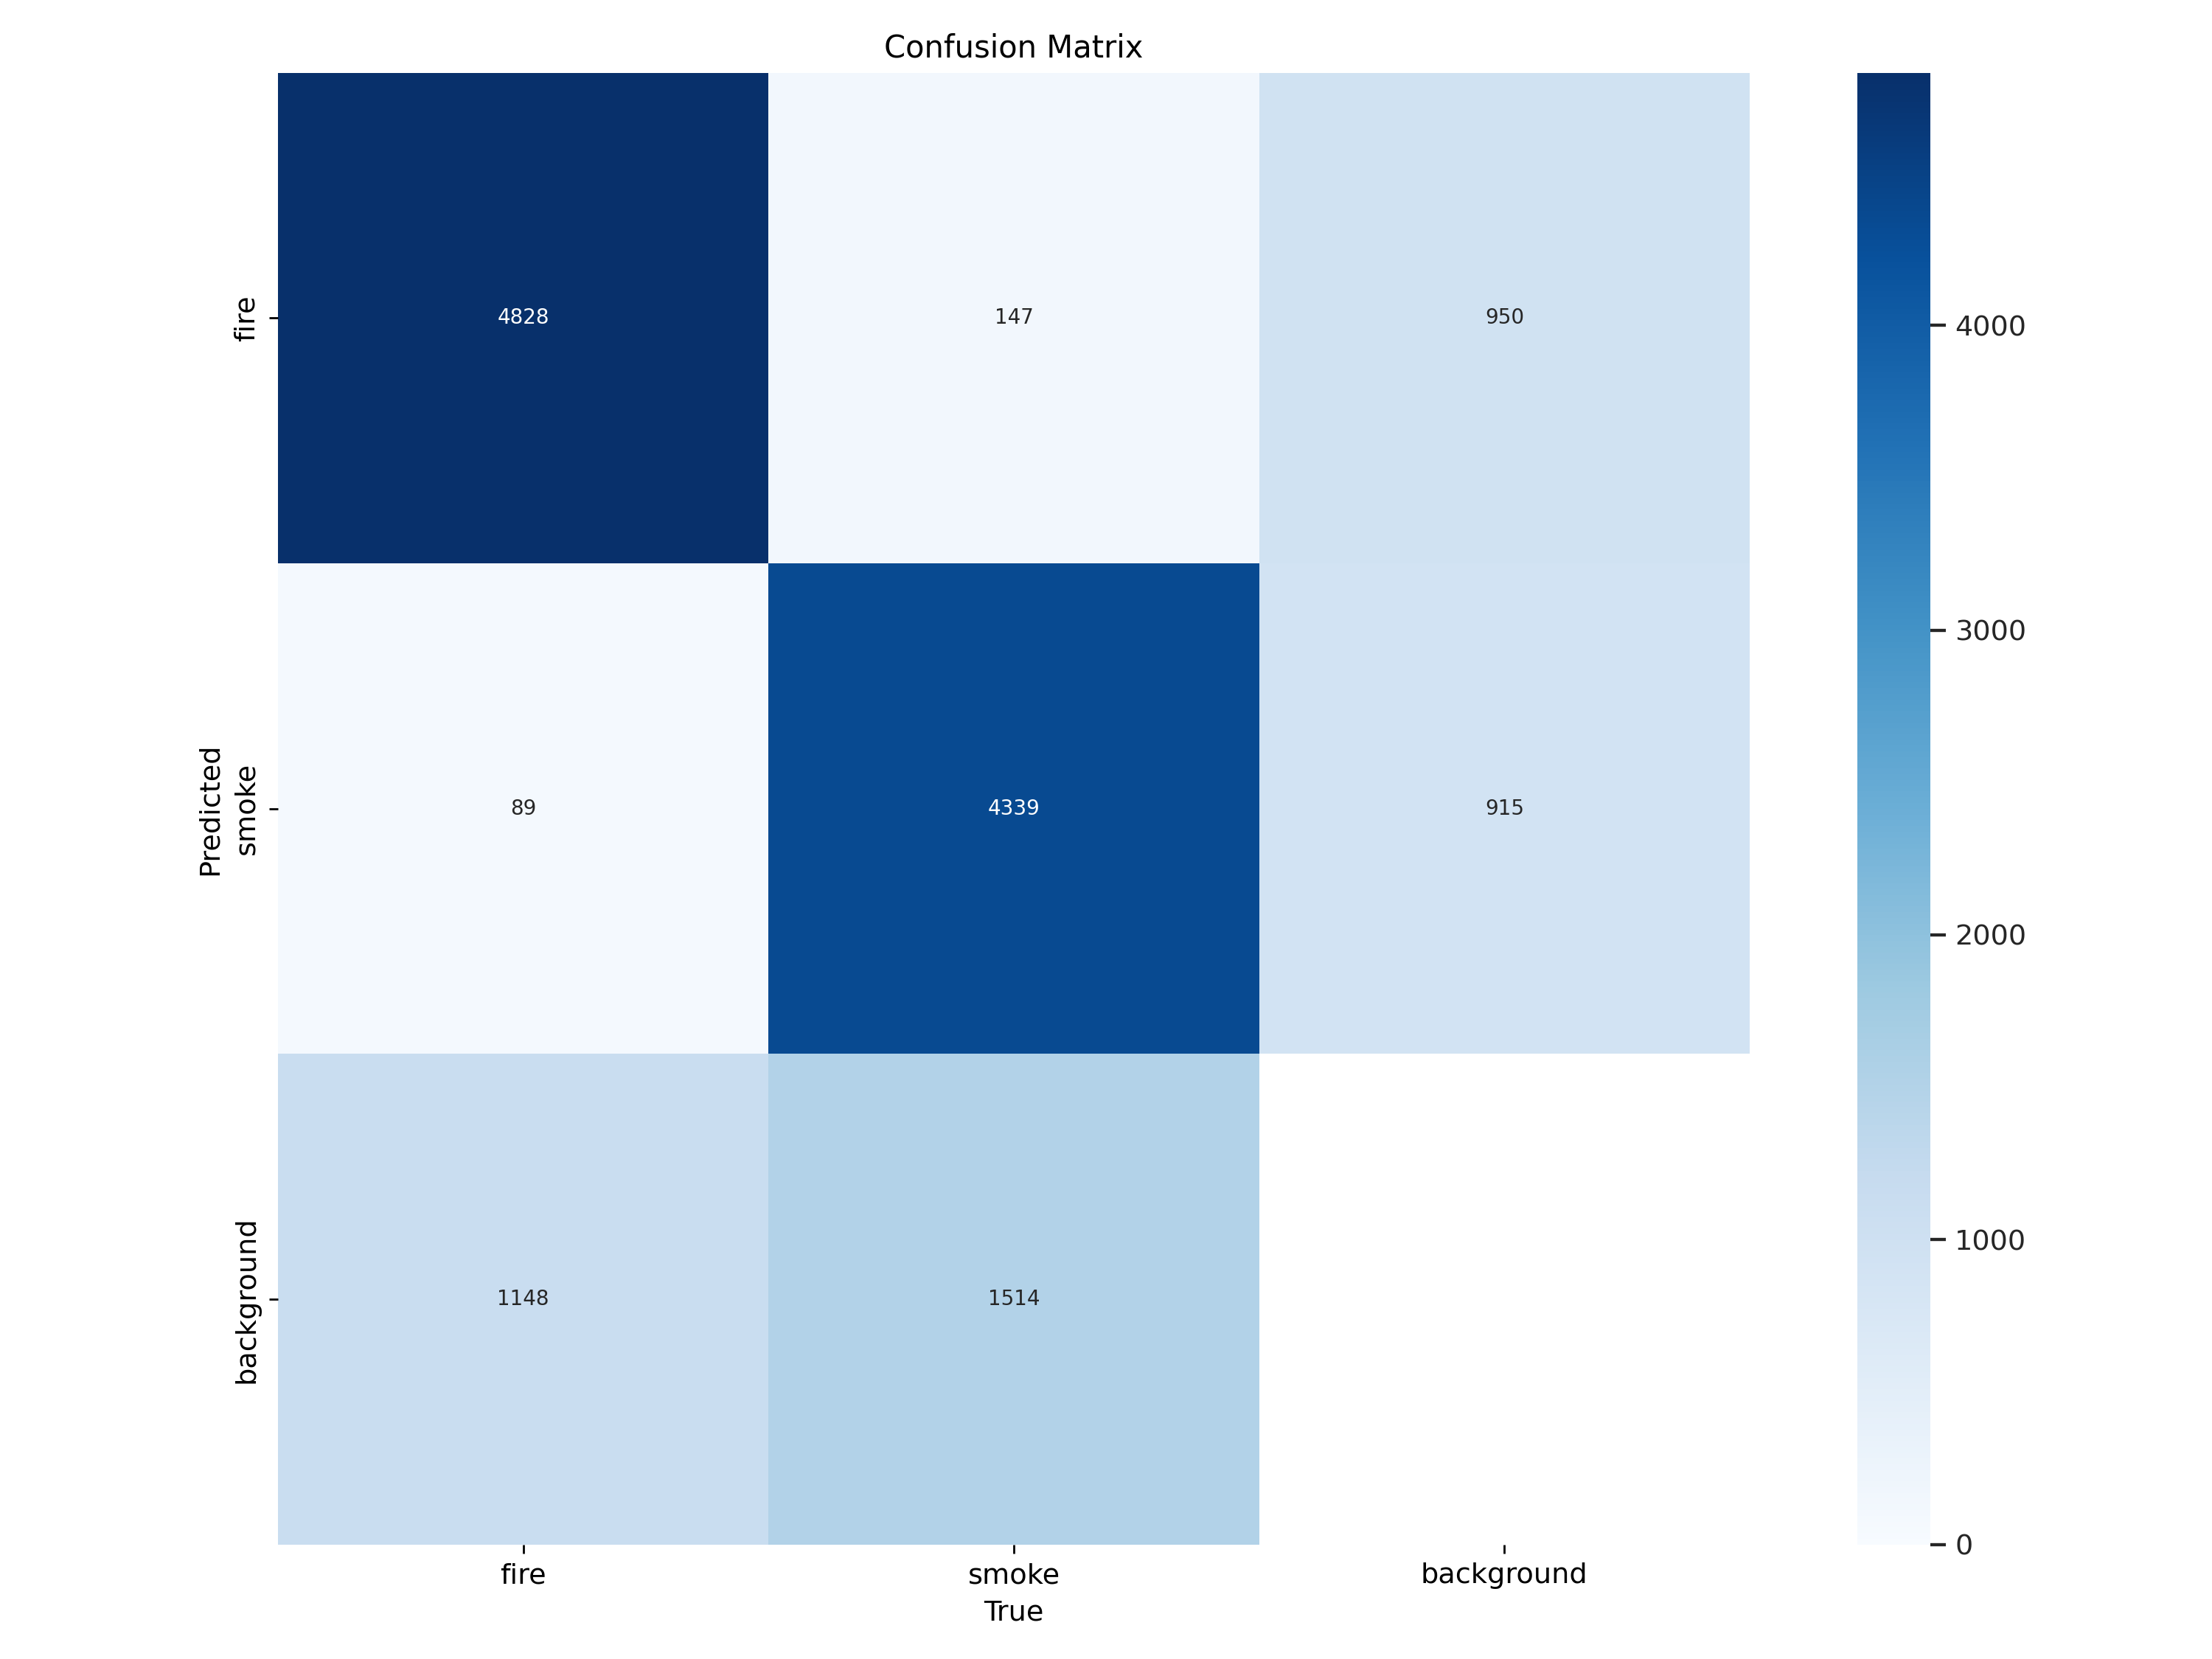

In [ ]:
#Image(filename=f'/runs/detect/train4/confusion_matrix.png', width=600)
Image(filename=f'/content/drive/MyDrive/Colab_Notebooks/yolov8fire/backup_fire/SGDRun2/confusion_matrix.png', width=600)

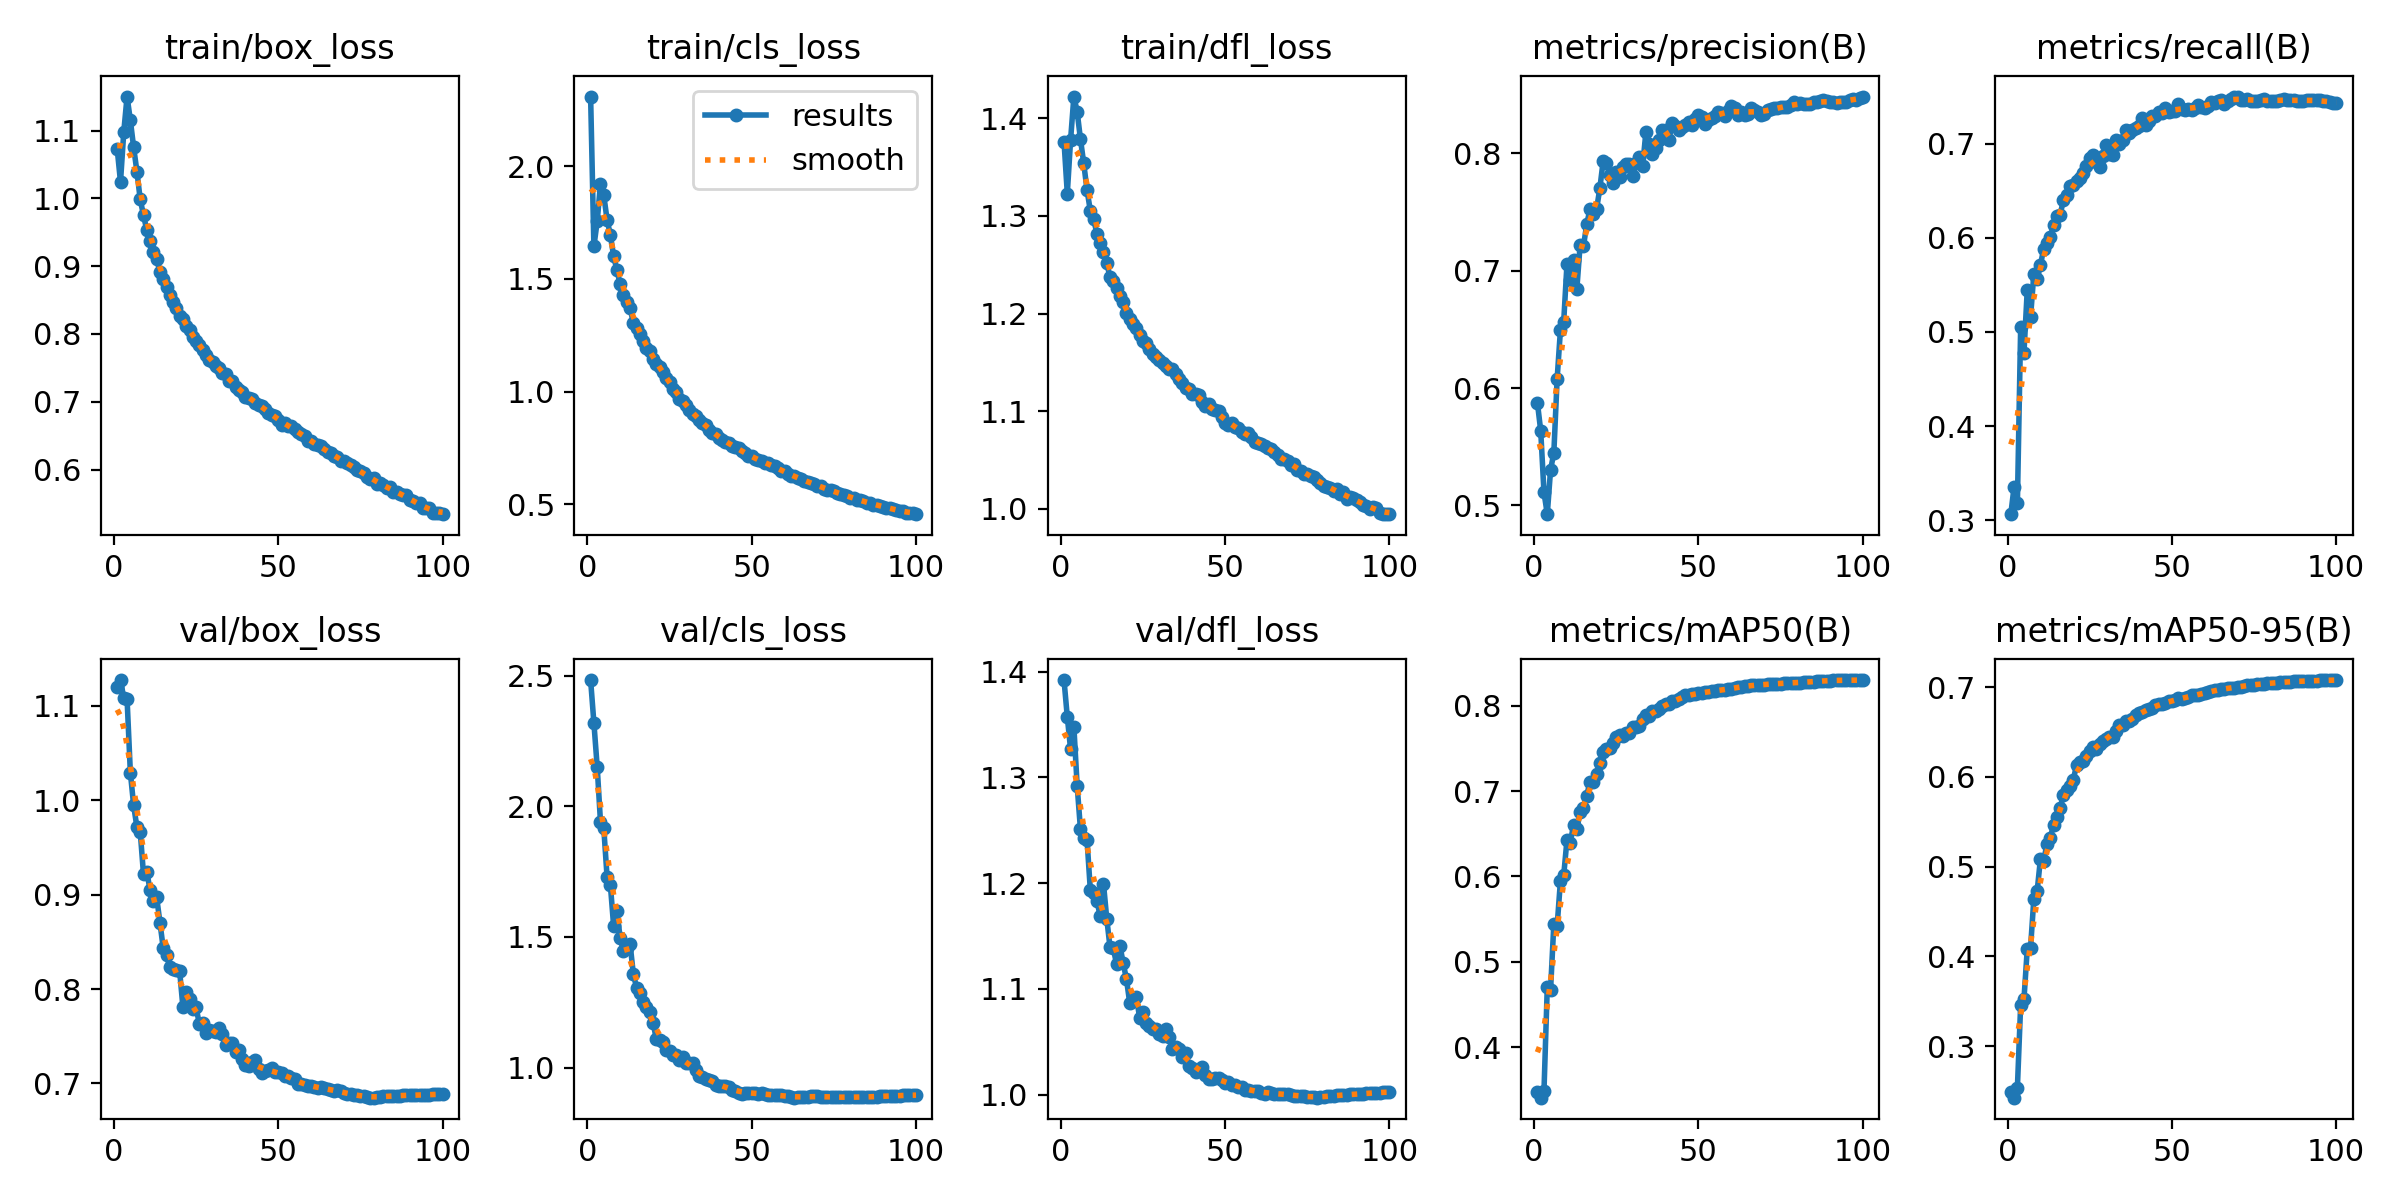

In [ ]:
Image(filename=f'/content/drive/MyDrive/Colab_Notebooks/yolov8fire/backup_fire/SGDRun2/results.png', width=600)

In [ ]:
Image(filename=f'/content/runs/detect/results.png', width=600)

We can now use the weights we got from training to validate our results. change the path below to point to your weights for the model parameter. also make sure that it is also pointing to your data.yaml file.

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/Colab_Notebooks/yolov8fire/backup_fire/SGDRun2/weights/best.pt data=/content/drive/MyDrive/Colab_Notebooks/yolov8fire/Fire-Detection-2/data.yaml

Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
100% 755k/755k [00:00<00:00, 26.3MB/s]
val: Scanning /content/drive/MyDrive/Colab_Notebooks/yolov8fire/Fire-Detection-2/val_split/labels.cache... 3999 images, 0 backgrounds, 0 corrupt: 100% 3999/3999 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 250/250 [01:29<00:00,  2.80it/s]
                   all       3999      12065      0.849      0.742       0.83      0.708
                  fire       3999       6065      0.832      0.771      0.856      0.709
                 smoke       3999       6000      0.866      0.714      0.804      0.707
Speed: 0.2ms preprocess, 1.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Testing

You can now test your model on the unseen data in your test set

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Colab_Notebooks/yolov8fire/backup_fire/SGDRun2/weights/best.pt data=!yolo task=detect mode=val model=/content/drive/MyDrive/Colab_Notebooks/yolov8fire/backup_fire/SGDRun2/weights/best.pt data=/content/drive/MyDrive/Colab_Notebooks/yolov8fire/Fire-Detection-2/data.yaml source=/content/drive/MyDrive/Colab_Notebooks/yolov8fire/Fire-Detection-2/test_split/images


Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/Colab_Notebooks/yolov8fire/Fire-Detection-2/val_split/labels.cache... 3999 images, 0 backgrounds, 0 corrupt: 100% 3999/3999 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 250/250 [01:10<00:00,  3.55it/s]
                   all       3999      12065      0.849      0.742       0.83      0.708
                  fire       3999       6065      0.832      0.771      0.856      0.709
                 smoke       3999       6000      0.866      0.714      0.804      0.707
Speed: 0.2ms preprocess, 1.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=val \
model=/content/drive/MyDrive/Colab_Notebooks/yolov8fire/backup_fire/SGDRun2/weights/best.pt \
data=/content/drive/MyDrive/Colab_Notebooks/yolov8fire/Fire-Detection-2/data.yaml \
source=/content/drive/MyDrive/Colab_Notebooks/yolov8fire/Fire-Detection-2/test_split/images \
project=/content/drive/MyDrive/Colab_Notebooks/yolov8fire/test_results \
name=SGDRun2test




Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/Colab_Notebooks/yolov8fire/Fire-Detection-2/val_split/labels.cache... 3999 images, 0 backgrounds, 0 corrupt: 100% 3999/3999 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 250/250 [01:04<00:00,  3.86it/s]
                   all       3999      12065      0.849      0.742       0.83      0.708
                  fire       3999       6065      0.832      0.771      0.856      0.709
                 smoke       3999       6000      0.866      0.714      0.804      0.707
Speed: 0.2ms preprocess, 1.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to /content/drive/MyDrive/Colab_Notebooks/yolov8fire/test_results/SGDRun2test
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/drive/MyDrive/Colab_Notebooks/yolov8fire/test_results/SGDRun2test/*.jpg'):
    display(Image(filename=image_path, height=600))
    print("\n")

Output hidden; open in https://colab.research.google.com to view.

Convert now to onnx for conversion later in vitas AI

In [ ]:
!python3 models/export.py --weights /content/drive/MyDrive/Colab_Notebooks/yolov8fire/backup_fire/SGDRun2/weights/best.pt --img-size 640 640 --batch-size 1 --device 0 --simplify --include onnx


python3: can't open file '/content/drive/MyDrive/Colab_Notebooks/yolov8fire/models/export.py': [Errno 2] No such file or directory


In [ ]:
!yolo export model=/content/drive/MyDrive/Colab_Notebooks/yolov8fire/backup_fire/SGDRun2/weights/best.pt format='onnx' imgsz=640


Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/Colab_Notebooks/yolov8fire/backup_fire/SGDRun2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (6.0 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 129.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 8.1s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 9.8s, saved as '/content/drive/MyDrive/Colab_Notebooks/yolov8fire/backup_fire/SGDRun2/weights/best.onnx' (11.7 MB)

Export complete (11.9s)
Results saved to /content/drive/MyDrive/Colab_Notebooks/yolov8fire/backup_fire/SGDRun2/weights
Pre

In [ ]:
!pip list -v | grep ultralytics

ultralytics                      8.1.45                /usr/local/lib/python3.10/dist-packages pip


In [ ]:
pip install onnx-tf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 48.2 MB/s eta 0:00:00


In [ ]:
import onnx
from onnx_tf.backend import prepare

# Load your ONNX model
onnx_model = onnx.load("/content/drive/MyDrive/Colab_Notebooks/yolov8fire/backup_fire/SGDRun2/weights/best.onnx")  # Change to the path of your .onnx file

# Convert
tf_rep = prepare(onnx_model)

# Export the model to a TensorFlow protobuf
tf_rep.export_graph("/content/drive/MyDrive/Colab_Notebooks/yolov8fire/backup_fire/SGDRun2/weights/best.pb")

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.NEAREST_NEIGHBOR...)` instead.
INFO:absl:Function `__call__` contains input name(s) x, y with unsupported characters which will be renamed to transpose_193_x, add_44_y in the SavedModel.
INFO:absl:Found untraced functions such as gen_tensor_dict while saving (showing 1 of 1). These functions will not be directly callable after loading.
INFO:absl:Writing fingerprint to /content/drive/MyDrive/Colab_Notebooks/yo